# Background

In this notebook we explore the use of error propagation to justify a parameter for our biased distribution. 

# Distributions
See the [proposal](https://github.com/davidthomas5412/PanglossNotebooks/blob/master/Proposal_2017_01_10.ipynb) for more background on the setup of our project. We have hyperparameters $\alpha_1,\alpha_2,\alpha_3,\alpha_4,S$ and to get a conditional luminosity as a function of the hyperparameters, mass ($M$), and redshift ($z$) we use the following distribution:

\begin{align*}
P(L|\alpha_1,\alpha_2,\alpha_3,\alpha_4,S,M,z) &= \text{Lognormal}(\mu_L, S)\\
\ln(\mu_L) &= \alpha_1 + \alpha_2 (\ln(M) - \ln(\alpha_3)) + \alpha_4 \ln (1+z)\\
\end{align*}

When creating our biased distribution for the likelihood we attempt to invert the above distribution in the following way.

\begin{align*}
P(M|\alpha_1,\alpha_2,\alpha_3,\alpha_4,S,M,z) &= \text{Lognormal}(\mu_M, S_M)\\
\ln(\mu_M) &= ln(\alpha_3) + \frac{\ln(L) - \alpha_1 - \alpha_4 \ln(1+z)}{\alpha_2}\\
\end{align*}

$S_M$ is the new parameter we wish to approximate.

# Propagation of Uncertainty

We use gaussian error propagation ([wikipedia](https://en.wikipedia.org/wiki/Propagation_of_uncertainty)) in log-space to approximate the log-variance in mass ($S_M$) from the log-variance in luminosity ($S$). 
\begin{align*}
S_M^2 &= \left(\frac{\partial \ln\mu_M}{\partial \ln L}\right)^2 \cdot S^2\\
S_M &= \left|\frac{\partial \ln\mu_M}{\partial \ln L} \right| \cdot S
\end{align*}

Plugging in the mean mass formula above and differentiating with respect to L yields

$$\frac{\partial \ln \mu_M}{\partial \ln L} = 1/\alpha_2$$

Just to be safe we use $\hat{S_M}$ which has an extra factor of two to make sure that we have adequate coverage of the unbiased distribution.

$$\hat{S_M} = \frac{2S}{\alpha}$$

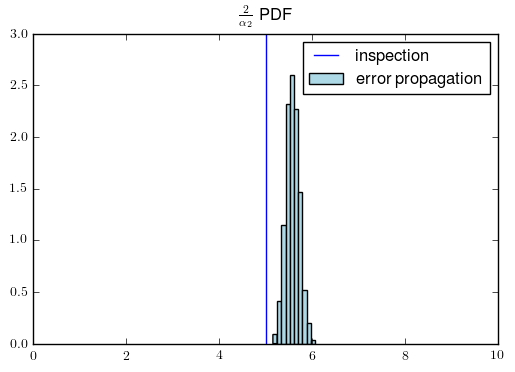

In [38]:
from scipy.stats import norm
import numpy as np


a2 = norm(0.359, 0.009).rvs(1000)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

plt.title(r'$\frac{2}{\alpha_2}$ PDF')
plt.gca().axvline(5, label='inspection')
plt.xlim(0,10)
plt.hist(2/a2, color='lightblue', normed=True, label='error propagation')
plt.legend();

# Conclusion
Previously we had been using a factor of 5 which we got by inspection. It is incredible that this result (5.6578015811698101) matches so well. Moving forward we will be using this new value.